In [3]:
!pip install tweepy
!pip install vaderSentiment

    100% |████████████████████████████████| 133kB 6.3MB/s 


In [0]:
import tweepy
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [0]:
#My Twitter API Authentication Variables
CONSUMER_KEY = 'k'
CONSUMER_SECRET = 'e'
ACCESS_KEY = 'y'
ACCESS_SECRET = 's'

In [0]:
auth = tweepy.auth.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)

api = tweepy.API(auth)
# tweets = api.search(q="Budget2019", count=1000)

'''
the below piece of code is swiped from :
https://stackoverflow.com/questions/22469713/managing-tweepy-api-search
Thanks to 'gumption' !!!
'''
query='CBIvsMamata'
max_tweets=2000
searched_tweets = []
last_id = -1
while len(searched_tweets) < max_tweets:
    count = max_tweets - len(searched_tweets)
    try:
        new_tweets = api.search(q=query, count=count, max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break


In [46]:
data=pd.DataFrame(data=[tweet.text for tweet in searched_tweets],columns=['tweet'])

display(data.head(5))
print('Total Data Size :',len(searched_tweets))

,tweet
0,RT @meenu13hindu: कभी कभी टीवी में विज्ञापन कि...
1,RT @rose_k01: Rahul Gandhi HIMSELF telling the...
2,@GeetaHindustani @isunil1992 @MamataOfficial R...
3,Utterly speechless on the [in]competence of #C...
4,RT @AzyConTroll: Finally modi broke his silenc...


Total Data Size : 2000


In [47]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
sid=SentimentIntensityAnalyzer()

# neg=list()
# neu=list()
# pos=list()
compound=list()
overall=list()

for index,row in data.iterrows():
  ss=sid.polarity_scores(row["tweet"])
  compound.append(ss['compound'])
  if(ss['compound']<0):
    overall.append('Negative')
  elif(ss['compound']>0):
    overall.append('Positive')
  else:
    overall.append('Neutral')

se=pd.Series(compound)
ov=pd.Series(overall)
data['polarity']=se.values
data['Reaction']=ov.values

In [49]:
display(data.sample(20))
print(data.iloc[325].tweet)

,tweet,polarity,Reaction
1914,RT @ShivAroor: Right now on TV:\n\nReporter to...,0.2023,Positive
437,RT @DurgaMenon: Is this called MULTIPLE DADDY ...,0.0000,Neutral
661,RT @Khandelw13Sagar: बड़ा खुलासा: शारदा चिटफंड...,0.0000,Neutral
1292,RT @SwamiGeetika: #MamataFreeBengal #DidiBlock...,-0.0890,Negative
950,Ravi Shankar Prasad calls opposition parties s...,0.6808,Positive
1640,तोता पूर्व नाम C B I मोदी सरकार मे सरकार के ईश...,0.0000,Neutral
1843,RT @SushantBSinha: मल्लिकार्जुन खड़गे कह रहे ह...,0.0000,Neutral
1586,".@rsprasad ने पूछा, आखिर राजीव कुमार क्या जानत...",0.0000,Neutral
1411,RT @Sootradhar: Congress Party's Mallikarjun K...,0.0000,Neutral
1514,#YONOSBI20U20 #SuperBowl #WorldCancerDay #CBIv...,0.0000,Neutral


मोदी सरकार के खिलाफ अभी भी जारी है ममता बनर्जी का धरना, यूजर्स ने बताया 'झांसी की रानी' और 'फाइटर'
#CBIvsMamata… https://t.co/IeChrlwkwo


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


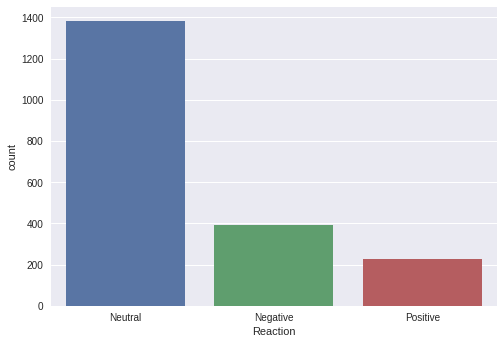

In [50]:
# data['polarity'][0]['compound']
import seaborn as sns
sns.countplot(x='Reaction',data=data)

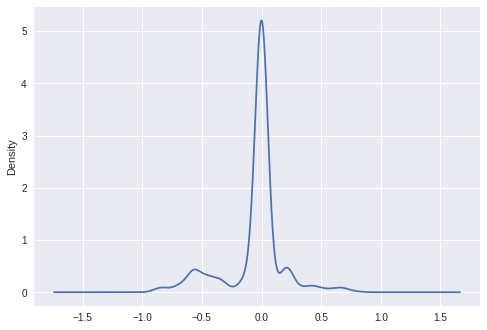

In [51]:
se.plot.kde()
